In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
os.chdir(os.getenv("PROJECT_ROOT"))

import numpy as np

In [120]:
from patrec.utils.files_helper import Format1_loader
from patrec.utils.visuals import plot_series, plot_series_grid

sample_1 = Format1_loader('data/Synthetic_data/17_06_samples/lin_sin/sample1_10_1_0.json')
sample_2 = Format1_loader('data/Synthetic_data/17_06_samples/quad/sample1_10_1_0.json')
sample_3 = Format1_loader('data/Synthetic_data/17_06_samples/lin_sin/sample1_10_4_0.json')

# FE_classes.py

## trend_decomposition.py

(101,)


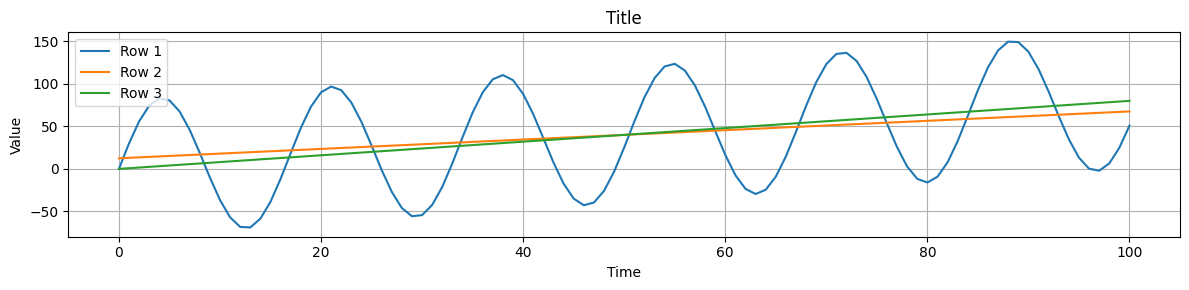

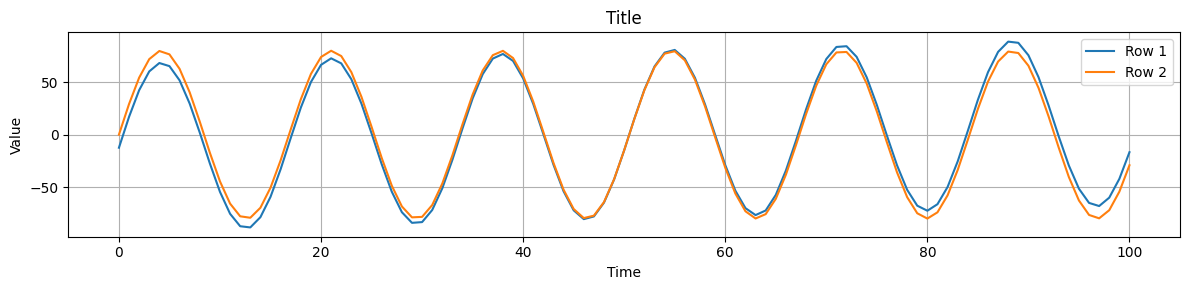

(101,)


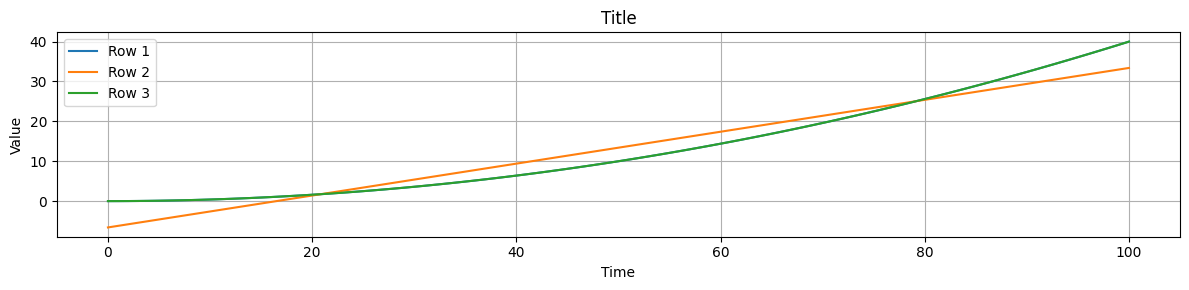

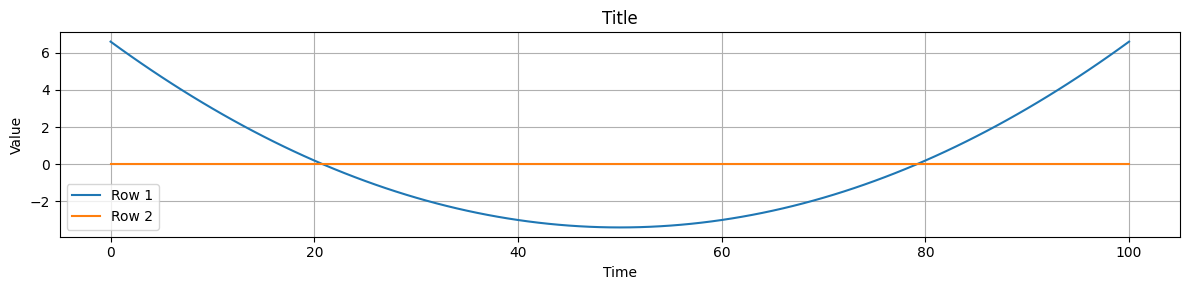

(101,)


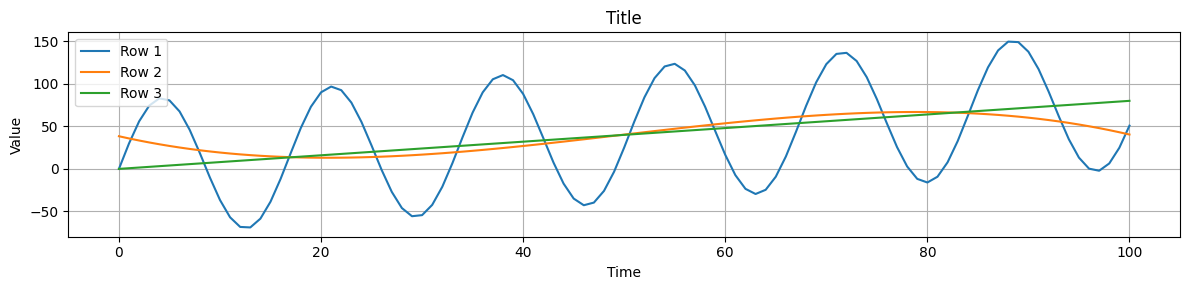

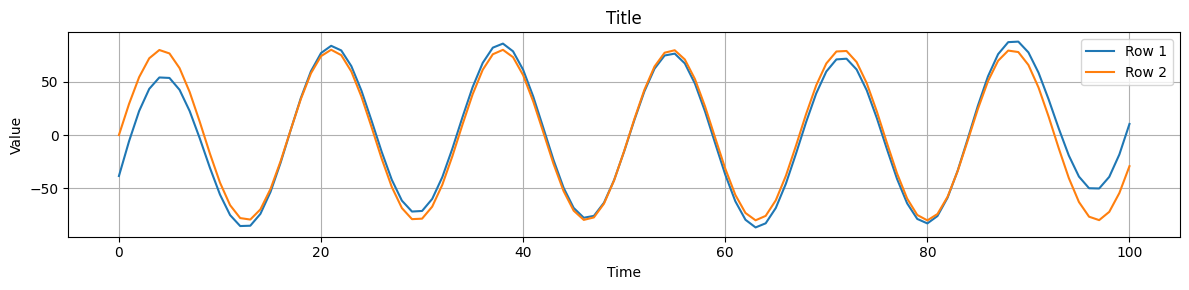

(101,)


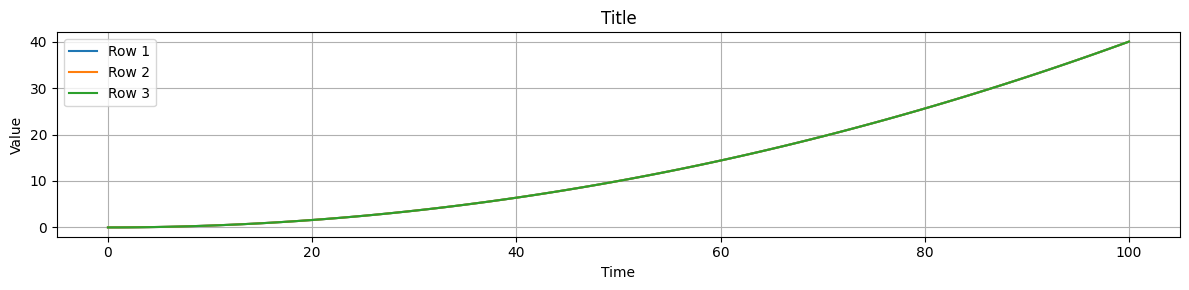

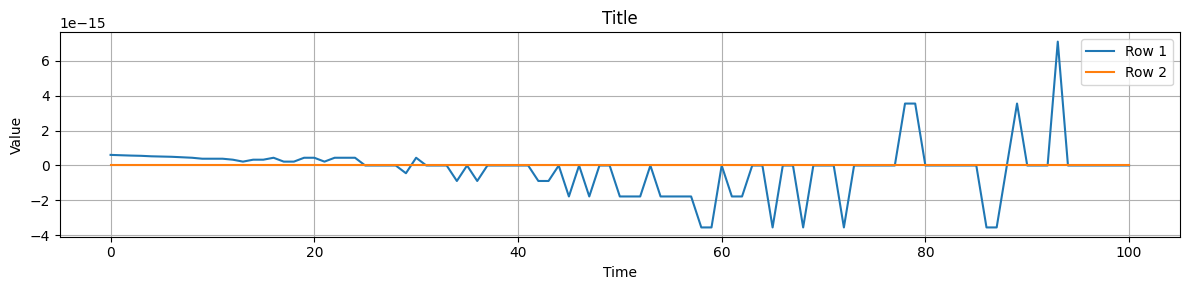

In [3]:
from patrec.feature_extraction.manual_methods.trend_decomposition import *
from patrec.generation.ts_generators import *

dec_method1 = Lin_trend_decomposer()
dec_method2 = Poly_trend_decomposer(params={'degree':1})
# dec_method3 = 

for meth in [dec_method1, dec_method2]:
    print(meth)
    for row, meta in zip([sample_1.data[0], sample_2.data[0]],[sample_1.meta[0], sample_2.meta[0]]):
        print(row.shape)
        result = meth.decompose(row)
        synth_gen = linear_trend if meta['trend']['params']['general']['generator_name'] == 'linear_trend' else quadratic_trend
        plot_series([row, result.component, synth_gen(**meta['trend']['params']['gen_params'])], figsize=(12,3))
        plot_series([row - result.component, row - synth_gen(**meta['trend']['params']['gen_params'])], figsize=(12,3))

In [4]:
result.stats

{'features': {'trend_slope': 13.4,
  'trend_poly_degree': 2,
  'trend_curvature': 0.007999999999999993,
  'trend_residual_std': 1.4618787689782433e-15}}

## seasonality_decomposition.py

2025-07-04 11:37:37.133033: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-04 11:37:37.144966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751639857.159032  133674 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751639857.163853  133674 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751639857.177866  133674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

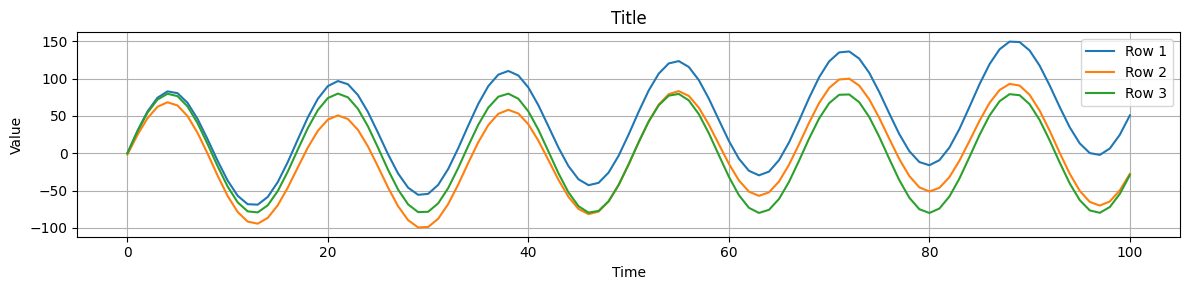

/root/patrec_time_series/.venv/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


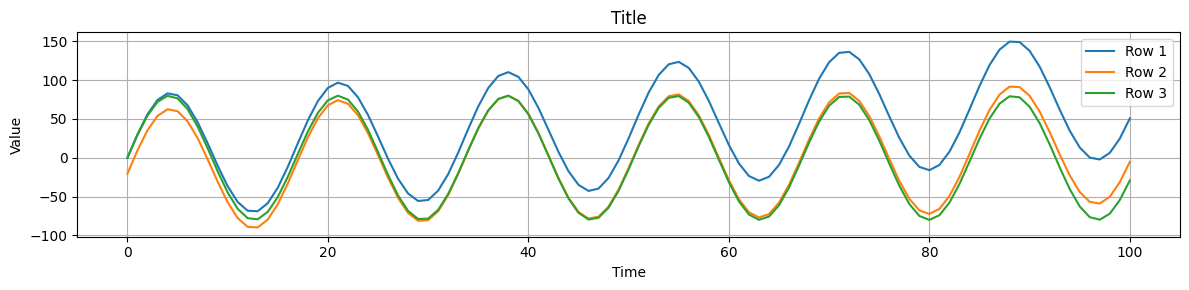

In [5]:
from patrec.feature_extraction.manual_methods.wave_decomposition import *

dec_method1 = DFT_wave_decomposer(n_freqs=2, fs=101)
dec_method2 = DWT_wave_decomposer(level=6)

for meth in [dec_method1, dec_method2]:
    print(meth)
    row, meta = sample_1.data[0], sample_1.meta[0]
    result = meth.decompose(row)
    synth_gen = sin_wave 
    plot_series([row, result.component, synth_gen(**meta['wave']['params']['gen_params'])], figsize=(12,3))

## shifts_decomposition.py

[]


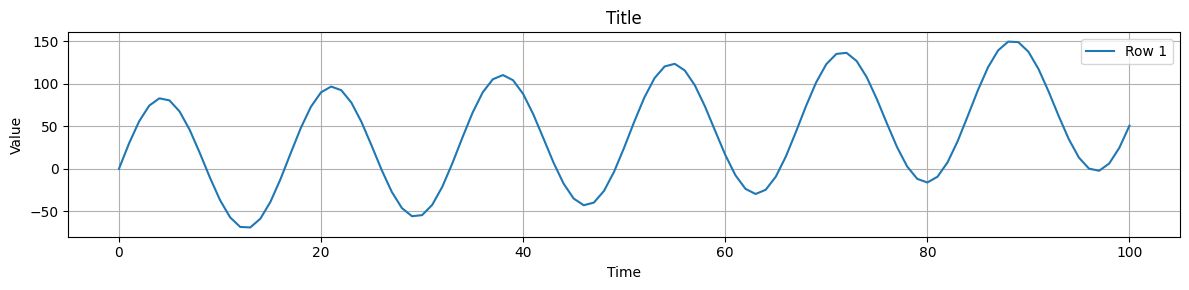

[ 10  20  30  40  50  60  70  80  90 101]


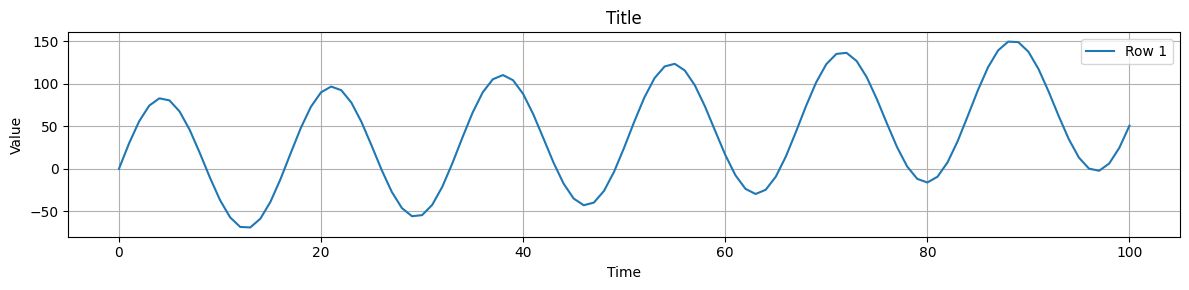

In [7]:
from patrec.feature_extraction.manual_methods.shifts_decomposition import *

dec_method1 = Peaks_break_detector()
dec_method2 = Pelt_break_detector(min_size=10)

for meth in [dec_method1, dec_method2]:
    print(meth)
    row, meta = sample_1.data[0], sample_1.meta[0]
    result = meth.decompose(row)
    print(result.component)
    plot_series([row], figsize=(12,3))

## noise_decomposition.py

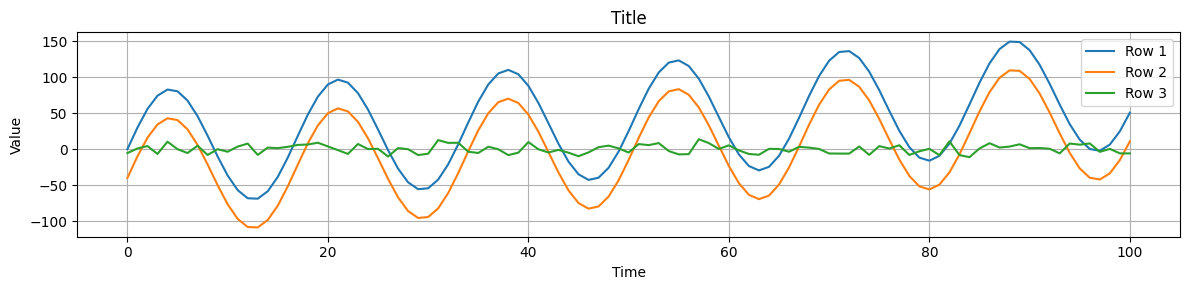

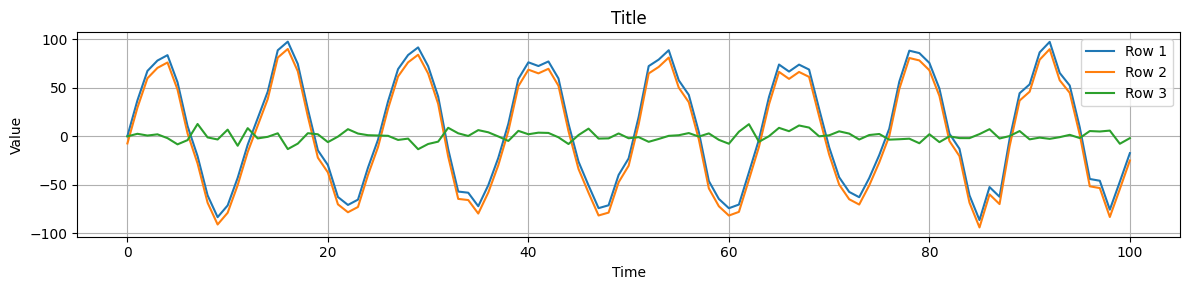

In [16]:
from patrec.feature_extraction.manual_methods.noise_decompostion import *

dec_method1 = Noise_evaluator()
dec_method2 = Synthetic_noise_generator('normal', noise_pct=0.1)

for smp in [sample_1, sample_3]:
    print(meth)
    row, meta = smp.data[0], smp.meta[0]
    result = dec_method1.decompose(row)
    synthetic = dec_method2.generate(row)
    plot_series([row, result.component, synthetic], figsize=(12,3))

# –í—ã—Å—Ç—É–ø–ª–µ–Ω–∏–µ 

In [5]:
from patrec.utils.ts_classes import TS_component, TS_additive_block, TS_component_type, Block_connector
from patrec.utils.files_helper import Format1_loader
from patrec.utils.visuals import plot_series

import numpy as np
import pandas as pd

## exp1

In [130]:
sample_1 = np.load('data/UCR_benchmark/datasets/DucksAndGeese/raw_features.npy')
labels_1 = pd.read_csv('data/UCR_benchmark/datasets/DucksAndGeese/labels.csv', header=None)
sample_1.shape, labels_1

((100, 1, 236784),
                                0
 0   black-bellied_whistling_duck
 1   black-bellied_whistling_duck
 2   black-bellied_whistling_duck
 3   black-bellied_whistling_duck
 4   black-bellied_whistling_duck
 ..                           ...
 95    white-faced_whistling_duck
 96    white-faced_whistling_duck
 97    white-faced_whistling_duck
 98    white-faced_whistling_duck
 99    white-faced_whistling_duck
 
 [100 rows x 1 columns])

In [133]:
labels_1.value_counts()

0                           
black-bellied_whistling_duck    20
canadian_goose                  20
greylag_goose                   20
pink-footed_goose               20
white-faced_whistling_duck      20
Name: count, dtype: int64

In [134]:
labels_1.values[0:5], labels_1.values[-5:]

(array([['black-bellied_whistling_duck'],
        ['black-bellied_whistling_duck'],
        ['black-bellied_whistling_duck'],
        ['black-bellied_whistling_duck'],
        ['black-bellied_whistling_duck']], dtype=object),
 array([['white-faced_whistling_duck'],
        ['white-faced_whistling_duck'],
        ['white-faced_whistling_duck'],
        ['white-faced_whistling_duck'],
        ['white-faced_whistling_duck']], dtype=object))

In [132]:
# labels_1.values[]

# inxs = [0, 25, 43, 71, 25]

In [135]:
# plot_series_grid([item for item in sample_1[0]], figsize=(12,10))

In [98]:
labels_1.values[300]

array([3])

In [ ]:
labels_1.values[inxs]

# black-bellied_whistling_duck
# greylag_goose

array([['greylag_goose'],
       ['greylag_goose'],
       ['greylag_goose'],
       ['greylag_goose'],
       ['greylag_goose']], dtype=object)

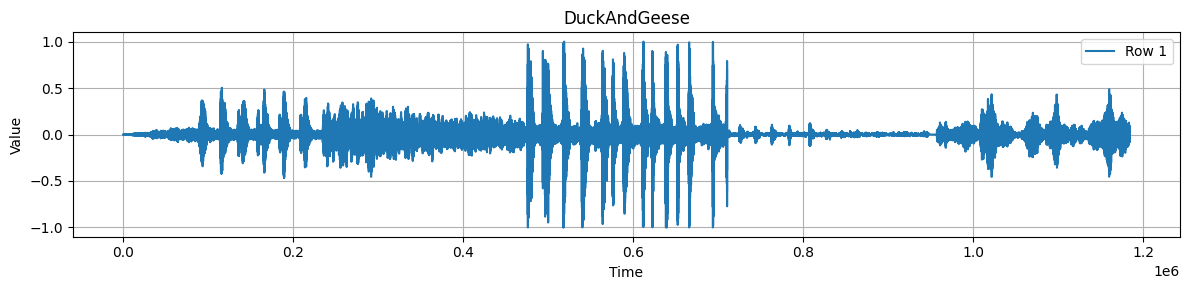

{'blocks': [{'components': {'SIGNAL': {'hash': '00d53fd64009434cd74254d8ea62c47c', 'params': {'label': "['black-bellied_whistling_duck']"}, 'name': 'segment_1'}}, 'block_metadata': {}}, {'components': {'SIGNAL': {'hash': '00d53fd64009434cd74254d8ea62c47c', 'params': {'label': "['black-bellied_whistling_duck']"}, 'name': 'segment_2'}}, 'block_metadata': {}}, {'components': {'SIGNAL': {'hash': '00d53fd64009434cd74254d8ea62c47c', 'params': {'label': "['black-bellied_whistling_duck']"}, 'name': 'segment_3'}}, 'block_metadata': {}}, {'components': {'SIGNAL': {'hash': '00d53fd64009434cd74254d8ea62c47c', 'params': {'label': "['black-bellied_whistling_duck']"}, 'name': 'segment_4'}}, 'block_metadata': {}}, {'components': {'SIGNAL': {'hash': 'bff4772c352706e02fa42e85479b4830', 'params': {'label': "['greylag_goose']"}, 'name': 'segment_20'}}, 'block_metadata': {}}], 'total_length': 5}


In [165]:
exp1 = Block_connector()


inxs = [1, 2, 3, 4,  20] 
# inxs = [22, 26, 29, 21, 20]
# 
# [3445, 3451, 3453]
# [256, 267, 367, 369, 2130, 2131, 3451, 3452]
for t, k in enumerate(inxs):
    block = TS_additive_block()
    block.add_component(TS_component(data=sample_1[k], component_type=TS_component_type.SIGNAL, params = {'label':str(labels_1.values[k])}, name=f'segment_{k}'))
    exp1.add_block(block, t)

plot_series(np.concatenate([item for item in exp1.get_component_series(TS_component_type.SIGNAL)]), figsize=(12,3), plot_title='DuckAndGeese')

print(exp1.get_metadata())   

In [174]:
import numpy as np
import pandas as pd
import stumpy

def safe_mstump(ts1, ts2, window_size):
    """–ë–µ–∑–æ–ø–∞—Å–Ω–æ–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–æ—Ñ–∏–ª—è —Å –ø—Ä–æ–≤–µ—Ä–∫–∞–º–∏"""
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    ts1 = np.array(ts1, dtype=np.float64)
    ts2 = np.array(ts2, dtype=np.float64)
    
    # –£–¥–∞–ª–µ–Ω–∏–µ NaN –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –¥–ª–∏–Ω—ã
    ts1 = ts1[~np.isnan(ts1)]
    ts2 = ts2[~np.isnan(ts2)]
    
    min_len = min(len(ts1), len(ts2))
    if min_len < 2:
        raise ValueError("–†—è–¥—ã –¥–æ–ª–∂–Ω—ã —Å–æ–¥–µ—Ä–∂–∞—Ç—å –º–∏–Ω–∏–º—É–º 2 —Ç–æ—á–∫–∏")
    
    # –ê–≤—Ç–æ–ø–æ–¥–±–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ –æ–∫–Ω–∞ –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
    max_window = min(30, min_len // 2)  # –ù–µ –±–æ–ª–µ–µ 30 –∏ –ø–æ–ª–æ–≤–∏–Ω—ã –¥–ª–∏–Ω—ã
    if window_size is None:
        window_size = max(5, min(10, max_window))  # –î–µ—Ñ–æ–ª—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 5-10
    elif window_size >= min_len:
        window_size = max_window
        print(f"–ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–∫—Ü–∏—è: —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ –∏–∑–º–µ–Ω–µ–Ω –Ω–∞ {window_size}")

    # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    ts1 = (ts1 - np.mean(ts1)) / (np.std(ts1) + 1e-10)
    ts2 = (ts2 - np.mean(ts2)) / (np.std(ts2) + 1e-10)
    
    # –§–æ—Ä–º–∏—Ä—É–µ–º –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–π —Ä—è–¥
    multi_ts = np.column_stack([ts1[:min_len], ts2[:min_len]])
    
    try:
        return stumpy.mstump(multi_ts, m=window_size)
    except Exception as e:
        print(f"–û—à–∏–±–∫–∞ MSTUMP: {e}. –ü—Ä–æ–±—É–µ–º STUMP...")
        # Fallback: –≤—ã—á–∏—Å–ª—è–µ–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä—è–¥–∞ –æ—Ç–¥–µ–ª—å–Ω–æ
        mp1 = stumpy.stump(ts1, m=window_size)
        mp2 = stumpy.stump(ts2, m=window_size)
        return (np.column_stack([mp1[:, 0], mp2[:, 0]]), 
                np.column_stack([mp1[:, 1], mp2[:, 1]]))

def export_mp_results(ts1, ts2, window_size=None, filename="mp_result.xlsx"):
    """–ü–æ–ª–Ω—ã–π –ø—Ä–æ—Ü–µ—Å—Å —Å —ç–∫—Å–ø–æ—Ä—Ç–æ–º"""
    try:
        distances, indices = safe_mstump(ts1, ts2, window_size)
        
        df = pd.DataFrame({
            "Duck_distance": distances[:, 0],
            "Duck_nearest_idx": indices[:, 0],
            "Geese_distance": distances[:, 1],
            "Geese_nearest_idx": indices[:, 1]
        })
        
        with pd.ExcelWriter(filename) as writer:
            df.to_excel(writer, sheet_name="MatrixProfile", index=False)
            pd.DataFrame({
                "–ü–∞—Ä–∞–º–µ—Ç—Ä": ["–†–∞–∑–º–µ—Ä –æ–∫–Ω–∞", "–î–ª–∏–Ω–∞ —Ä—è–¥–æ–≤", "–ú–µ—Ç–æ–¥"],
                "–ó–Ω–∞—á–µ–Ω–∏–µ": [window_size, len(df), "MSTUMP"]
            }).to_excel(writer, sheet_name="–ú–µ—Ç–∞–¥–∞–Ω–Ω—ã–µ", index=False)
        
        print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ {filename}")
        return df
    except Exception as e:
        print(f"–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞: {str(e)}")
        return None

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
if __name__ == "__main__":
    # –í–∞—à–∏ –¥–∞–Ω–Ω—ã–µ (–ø—Ä–∏–º–µ—Ä)
    duck_data = np.random.rand(200)
    geese_data = np.random.rand(200)
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∏ —ç–∫—Å–ø–æ—Ä—Ç
    result = export_mp_results(duck_data, geese_data, window_size=30)

–û—à–∏–±–∫–∞ MSTUMP: negative dimensions not allowed. –ü—Ä–æ–±—É–µ–º STUMP...
–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ mp_result.xlsx


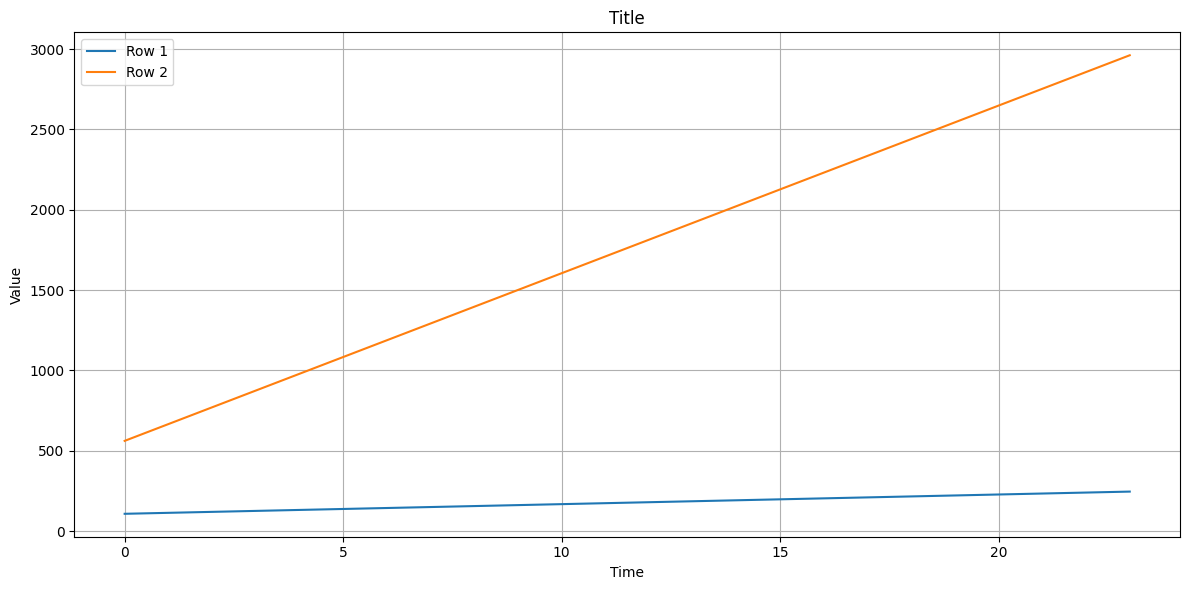

In [76]:
model = Lin_trend_decomposer()

res1 = model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[0])

res2 = model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[-1]) 

plot_series([res1.component, res2.component])

Decomposition_result(component=array([-249.34501767, -455.28471041, -630.19750252, -762.16337628,
       -842.18907549, -864.82098098, -828.51676581, -735.75050223,
       -592.84405781, -409.53627058, -198.31926329,   26.41287405,
        249.34501767,  455.28471041,  630.19750252,  762.16337628,
        842.18907549,  864.82098098,  828.51676581,  735.75050223,
        592.84405781,  409.53627058,  198.31926329,  -26.41287405]), component_type=<FE_component_type.SEASONAL: 2>, method_name='dft_seasonality', params={'n_freqs': 1, 'fs': 24, 'min_power_ratio': 0.1, 'min_freq': None, 'max_freq': None, 'freq_vals': [1.0], 'pos_power': array([1.07800268e+08, 2.03133249e+05, 3.56949980e+06, 1.96798300e+06,
       1.89978883e+05, 5.77090000e+04, 5.95926179e+04, 1.33330000e+04,
       3.26421951e+04, 4.51667511e+04, 1.76095420e+03])}, stats={'execution_time_sec': 0.0001761913299560547, 'input_shape': (24,)}, features=None)
Decomposition_result(component=array([-341.98423183, -472.12283354, -57

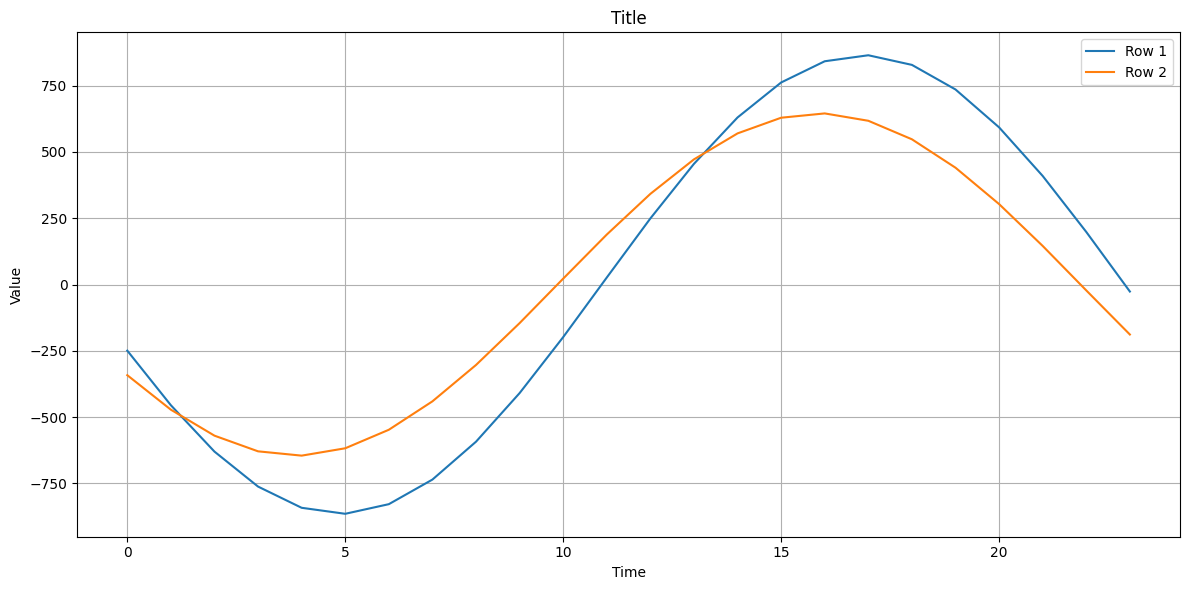

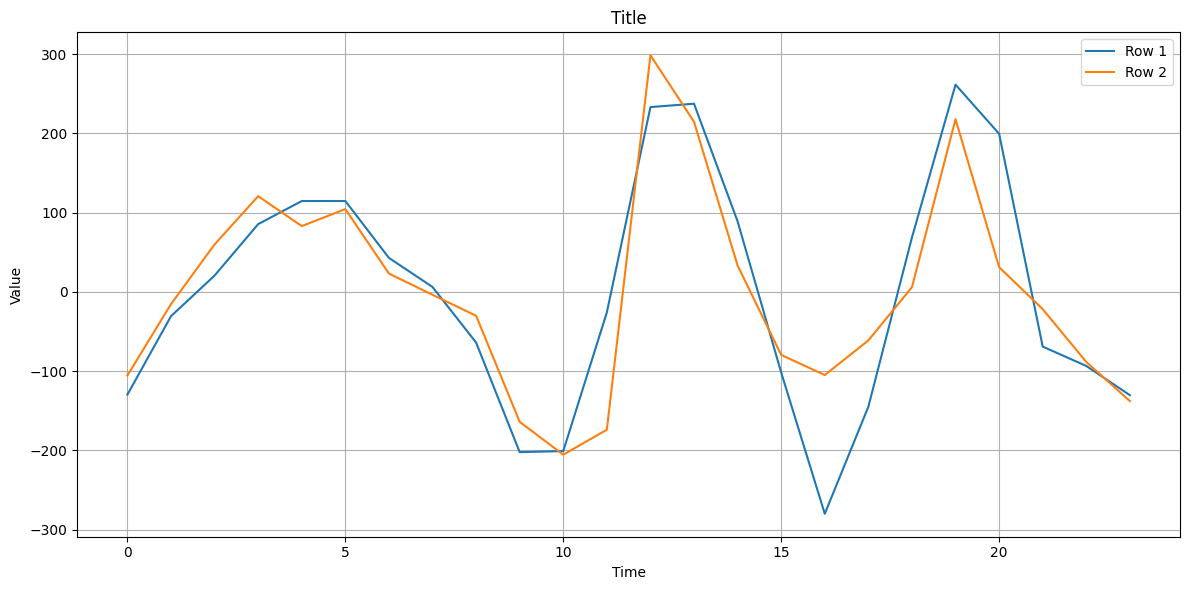

In [18]:
from patrec.feature_extraction.manual_methods.wave_decomposition import  DFT_wave_decomposer

model = DFT_wave_decomposer(1, fs=24)

print(model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[0]))
print(model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[2]))

res1=model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[0])
res2=model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[2])
plot_series([res1.component, res2.component])

model = DFT_wave_decomposer(10, fs=24)

res11=model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[0])
res21=model.decompose(exp1.get_component_series(TS_component_type.SIGNAL)[2])

plot_series([res11.component - res1.component, res21.component - res2.component])


107800268.0

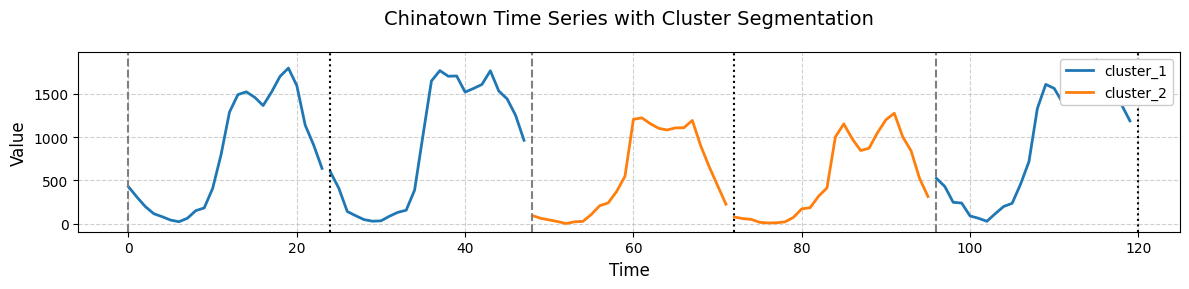

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d  # –î–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö

# –î–∞–Ω–Ω—ã–µ
row = exp1.get_component_series(TS_component_type.SIGNAL)
labels = [1, 1, 2, 2, 1]

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è
sigma = 1.5  # –ü–∞—Ä–∞–º–µ—Ç—Ä —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è (–º–æ–∂–Ω–æ —Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å)

# –¶–≤–µ—Ç–∞ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
colors = {1: '#1f77b4', 2: '#ff7f0e'}  # –ë–æ–ª–µ–µ –ø—Ä–∏—è—Ç–Ω—ã–µ –æ—Ç—Ç–µ–Ω–∫–∏ —Å–∏–Ω–µ–≥–æ –∏ –æ—Ä–∞–Ω–∂–µ–≤–æ–≥–æ
cluster_names = {1: 'cluster_1', 2: 'cluster_2'}

# –°–æ–∑–¥–∞–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(12, 3))
# plt.style.use('seaborn')  # –ë–æ–ª–µ–µ –ø—Ä–∏—è—Ç–Ω—ã–π —Å—Ç–∏–ª—å

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ —Å —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º —Ü–≤–µ—Ç–æ–º
time = np.arange(0, 120, 1)  # 24 —Ç–æ—á–∫–∏ * 5 —Å–µ–≥–º–µ–Ω—Ç–æ–≤ = 120 –µ–¥–∏–Ω–∏—Ü –≤—Ä–µ–º–µ–Ω–∏

for i in range(5):
    start_idx = i * 24
    end_idx = (i + 1) * 24
    
    # –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
    # smoothed_data = gaussian_filter1d(row[i], sigma=sigma)
    
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–π –ª–∏–Ω–∏–∏
    plt.plot(time[start_idx:end_idx], row[i], 
             color=colors[labels[i]], 
             linewidth=2,
             label=cluster_names[labels[i]] if i == 0 or labels[i] != labels[i-1] else "")
    
    # # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ª—É–ø—Ä–æ–∑—Ä–∞—á–Ω–æ–π –æ–±–ª–∞—Å—Ç–∏ –≤–æ–∫—Ä—É–≥ –ª–∏–Ω–∏–∏
    # plt.fill_between(time[start_idx:end_idx], smoothed_data, 
    #                  alpha=0.2, color=colors[labels[i]])

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã—Ö –ª–∏–Ω–∏–π —Å —á–µ—Ä–µ–¥–æ–≤–∞–Ω–∏–µ–º —Å—Ç–∏–ª–µ–π
for i in range(6):  # 5 —Å–µ–≥–º–µ–Ω—Ç–æ–≤ = 6 –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã—Ö –ª–∏–Ω–∏–π
    if i % 2 == 0:
        plt.axvline(x=i*24, color='gray', linestyle='--')
    else:
        plt.axvline(x=i*24, color='black', linestyle=':')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ—Å–µ–π –∏ –∑–∞–≥–æ–ª–æ–≤–∫–∞
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Chinatown Time Series with Cluster Segmentation', fontsize=14, pad=20)
plt.xticks(np.arange(0, 121, 20), fontsize=10)
plt.yticks([0, 500, 1000, 1500], fontsize=10)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ª–µ–≥–µ–Ω–¥—ã
handles = [plt.Line2D([0], [0], color=colors[k], lw=2, label=cluster_names[k]) for k in colors]
plt.legend(handles=handles, loc='upper right', framealpha=1)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å–µ—Ç–∫–∏
plt.grid(True, linestyle='--', alpha=0.6)

# –£–ª—É—á—à–µ–Ω–∏–µ –æ—Ç—Å—Ç—É–ø–æ–≤
plt.tight_layout()

plt.show()

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

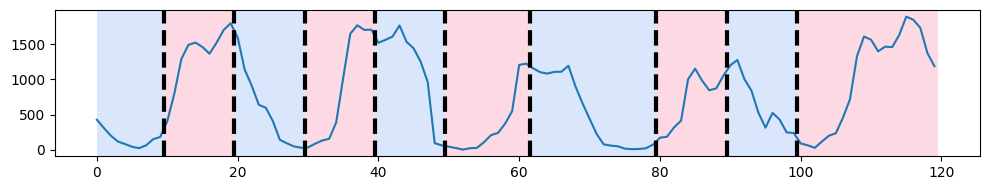

In [136]:
from patrec.segmentation.statistics_segm import PeltSegmentor

vis_row = np.concatenate([item for item in exp1.get_component_series(TS_component_type.SIGNAL)])
model = PeltSegmentor(min_size=6, jump=10)
res = model.infer(vis_row)
res_new = [10,  20,  30,  40,  50,  62,  80,  90, 100, 120]
model.plot(vis_row, res_new, res_new)

## exp2

## exp3

## exp4

# OLD

In [1]:
import os 
os.chdir("/root/patrec_time_series/")
from pathlib import Path

import numpy as np

from patrec.utils.visuals import plot_series
from patrec.utils.files_helper import TS_baseloader, Format1_loader 
from patrec.generation.ts_creation import *

In [2]:
def save_to_json(data, filepath):
    def convert(o):
        if isinstance(o, np.ndarray):
            return o.tolist()
        if isinstance(o, np.generic):
            return o.item()
        raise TypeError(f"Object of type {o.__class__.__name__} is not JSON serializable")
    
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4, default=convert)

import shutil 
def remove_result(folder_path):
    if folder_path.exists() and folder_path.is_dir():
        shutil.rmtree(folder_path)
        print(f"–ü–∞–ø–∫–∞ {folder_path} —É–¥–∞–ª–µ–Ω–∞")
    else:
        print(f"–ü–∞–ø–∫–∞ {folder_path} –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç")

# create "real" data sample

datasets: 
data format = (dimensions_num - classes num)

**TRAFFIC** 
  - Chinatown (1-2) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –ó–∞–¥–∞—á–∞ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –¥–Ω—è –Ω–µ–¥–µ–ª–∏ (2 —Ç–∏–ø–∞ –≤—ã—Ö–æ–¥–Ω–æ–π –∏ –±—É–¥–Ω–∏–π –¥–µ–Ω—å)
  - MelbournePedestrian (1-10)  *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –ù–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ –ø–æ–¥—Å—á–µ—Ç–∞ –ø–µ—à–µ—Ö–æ–¥–æ–≤, —á—Ç–æ–±—ã –ª—É—á—à–µ –ø–æ–Ω—è—Ç—å –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø–µ—à–µ—Ö–æ–¥–æ–≤ –≤ –º—É–Ω–∏—Ü–∏–ø–∞–ª–∏—Ç–µ—Ç–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–∞–∫ –ª—é–¥–∏ –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Ä–∞–∑–Ω—ã–µ –º–µ—Å—Ç–∞ –≥–æ—Ä–æ–¥–∞ –≤ —Ä–∞–∑–Ω–æ–µ –≤—Ä–µ–º—è —Å—É—Ç–æ–∫. –ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç –ø–æ–º–æ—á—å –≤ –ø—Ä–∏–Ω—è—Ç–∏–∏ —Ä–µ—à–µ–Ω–∏–π –∏ –≥–æ—Ä–æ–¥—Å–∫–æ–º –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ –Ω–∞ –±—É–¥—É—â–µ–µ. –ú—ã –∏–∑–≤–ª–µ–∫–∞–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ 10 –ª–æ–∫–∞—Ü–∏—è–º –∑–∞ –≤–µ—Å—å 2017 –≥–æ–¥

**SPECTRO**
  - EthanolConcentration (3-4) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è —ç—Ç–∞–ª–æ–Ω–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞—Ñ–∞ 
  - EthanolLevel (1-4) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—Ä–æ–≤–Ω—è —ç—Ç–∞–ª–æ–Ω–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞–Ω–Ω—ã—Ö —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞—Ñ–∞ 
  - Rock (1-4) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç 70 –æ–±—Ä–∞–∑—Ü–æ–≤ –≥–æ—Ä–Ω—ã—Ö –ø–æ—Ä–æ–¥.  –ö–∞–∂–¥–∞—è —Å–µ—Ä–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å–ø–µ–∫—Ç—Ä–∞–ª—å–Ω—É—é –æ—Ç—Ä–∞–∂–∞—Ç–µ–ª—å–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –≥–æ—Ä–Ω—ã—Ö –ø–æ—Ä–æ–¥ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –¥–ª–∏–Ω—ã –≤–æ–ª–Ω—ã –≤ –º–∏–∫—Ä–æ–Ω–∞—Ö, –∞ –Ω–µ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏. –ö–ª–∞—Å—Å—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Ç–∏–ø—É –≥–æ—Ä–Ω—ã—Ö –ø–æ—Ä–æ–¥. - –ö–ª–∞—Å—Å 1: –º—Ä–∞–º–æ—Ä; - –ö–ª–∞—Å—Å 2: –∫–≤–∞—Ä—Ü–∏—Ç; - –ö–ª–∞—Å—Å 3: –º—Ä–∞–º–æ—Ä; - –ö–ª–∞—Å—Å 4: —Å–ª–∞–Ω–µ—Ü.
  - Ham (1-2) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –ü–∏—â–µ–≤—ã–µ —Å–ø–µ–∫—Ç—Ä–æ–≥—Ä–∞—Ñ—ã –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –≤ —Ö–µ–º–æ–º–µ—Ç—Ä–∏–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–∏–ø–æ–≤ –ø–∏—â–µ–≤—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤. –î–∞–Ω–Ω—ã–µ –æ –≤–µ—Ç—á–∏–Ω–µ –≤–∫–ª—é—á–∞—é—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏–∑–º–µ—Ä–µ–Ω–∏–π 19 –∏—Å–ø–∞–Ω—Å–∫–∏—Ö –∏ 18 —Ñ—Ä–∞–Ω—Ü—É–∑—Å–∫–∏—Ö —Å—ã—Ä–æ–≤—è–ª–µ–Ω—ã—Ö –æ–∫–æ—Ä–æ–∫–æ–≤.

**SIMULATED**
  - ShapeletSim (1-2) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç Shapelets 
  - Mallat (1-8) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –°–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è Wavelet –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π

**SENSOR**
  - ItalyPowerDemand (1-2) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –ó–∞–¥–∞—á–∞ –ø–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –¥–≤—É—Ö –ø–µ—Ä–∏–æ–¥–æ–≤ ()
  - ElectricDeviceDetection (1-2) *–ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª–∏–π*. –ó–∞–¥–∞—á–∞ –ø–æ –≤—ã–¥–µ–ª–µ–Ω–∏—é —Å–Ω–∏–º–∫–æ–≤, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –µ–ª–µ–∫—Ç—Ä–æ–Ω–Ω–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ. 
  - Car (1-4) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –î–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –∫–æ–Ω—Ç—É—Ä—ã —á–µ—Ç—ã—Ä–µ—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç–∏–ø–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–π, –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –∏–∑ –≤–∏–¥–µ–æ–∑–∞–ø–∏—Å–µ–π –¥–æ—Ä–æ–∂–Ω–æ–≥–æ –¥–≤–∏–∂–µ–Ω–∏—è —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –¥–≤–∏–∂–µ–Ω–∏–∏. –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—ã–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã –≤ —Ç—Ä–µ—Ö–º–µ—Ä–Ω—É—é —Å–µ—Ä–∏—é. –¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –±—ã–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –æ–¥–Ω–æ–º—É –∏–∑ —á–µ—Ç—ã—Ä–µ—Ö –∫–ª–∞—Å—Å–æ–≤: —Å–µ–¥–∞–Ω, –ø–∏–∫–∞–ø, –º–∏–Ω–∏–≤—ç–Ω –∏–ª–∏ –≤–Ω–µ–¥–æ—Ä–æ–∂–Ω–∏–∫
  - FaultDetectionA (1-3) *–ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è*. –ó–∞–¥–∞—á–∏ –¥–≤–µ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏–µ –∏–ª–∏ –µ–≥–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ, –∞ —Ç–∞–∫–∂–µ –ª–æ–∫–∞–ª–∏–∑–∞—Ü–∏—è –ø–æ–≤—Ä–µ–∂–¥–µ–Ω–∏—è (–≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–µ –∏–ª–∏ –≤–Ω–µ—à–Ω–µ–µ)
  - DodgerLoopDay (1-3) 
  - BasicMotions (4-6)

**OTHER**
  - ECG200 (1-2). Generalized feature extraction for structural pattern recognition in time-series data
  - ECG5000 (1-5)

**Filtered**
  - Earthquakes (1-2) *–ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª–∏–π*. —Ç—É—Ç –µ—Å—Ç—å –ø—Ä–æ–±–ª–µ–º–∞ —Å –Ω–µ—Å—Ç—Ä–∞–Ω–¥–∞—Ä—Ç–Ω–æ—Å—Ç—å—é –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤, –æ–¥–Ω–∞–∫–æ –æ—Å—Ç–∞–≤–∏–ª, —á—Ç–æ–±—ã –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã NN. –í —Å–∞–º–æ–π –∑–∞–¥–∞—á–µ. –û–Ω–∞ –ø—Ä–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –Ω–µ–∂–µ–ª–∏ –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤. –°–∞–º–∞ –∑–∞–¥–∞—á–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø–æ —Å–∏–≥–Ω–∞–ª—É –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –±—É–¥–µ—Ç –ª–∏ –∑–µ–º–ª—è—Ç—Ä–µ—Å–µ–Ω–∏–µ, –∞ –Ω–µ –ø—Ä–æ –∑–∞–¥–∞—á—É –∏–∑ —Ä–∞–∑—Ä—è–¥–∞ –≤–æ—Ç –ø–∞—Ç—Ç–µ—Ä–Ω.
  - DucksAndGeese (1-5). –°–ª–∏—à–∫–æ–º –¥–ª–∏–Ω—ã–µ —Ä—è–¥—ã –∏ –Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—è—Ç–Ω–æ –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–≤—è–∑–∞—Ç—å –∫ –ø–∞—Ç—Ç–µ—Ä–Ω —Ä–µ–∫–æ–≥–Ω–∏—à–µ–Ω. 


In [6]:
all_datasets = [item for item in 'Chinatown, MelbournePedestrian, EthanolLevel, Rock, Ham, ShapeletSim, Mallat, ItalyPowerDemand, ElectricDeviceDetection, Earthquakes, Car, FaultDetectionA, DodgerLoopDay, ECG200, ECG5000, DucksAndGeese'.split(', ')]

inside_pattern = [item for item in 'Chinatown, MelbournePedestrian, Car, DodgerLoopDay, ECG200, ECG5000, EthanolLevel, Ham, ItalyPowerDemand, Mallat, Rock'.split(', ')]

full_series_patten = [item for item in 'DucksAndGeese, DodgerLoopDay, ElectricDeviceDetection, EthanolLevel, FaultDetectionA, Ham, Mallat, Rock'.split(', ')]

# ['EthanolConcentration, BasicMotions, ']
all_datasets[:4]

['Chinatown', 'MelbournePedestrian', 'EthanolLevel', 'Rock']

In [ ]:
from patrec.utils.parse_UCR import load_UCR
from patrec.utils.transform_tools import split_train_test

def load_data_UCR(dataset_name, split_ratio=0.7, random_state=25):
    X, y, metadata = load_UCR(dataset_name)
    X_train, X_test, y_train, y_test = split_train_test(X, y, split_ratio, random_state)
    X_train = X_train.squeeze(1) 
    X_test = X_test.squeeze(1)
    return X_train, X_test, y_train, y_test, metadata

from collections import defaultdict
from typing import List, Union, Dict

def sample_equal_classes(
    X: Union[List[np.ndarray], np.ndarray],
    y: Union[List[int], np.ndarray],
    samples_per_class: int,
    random_state: int = 42
) -> Dict[str, List]:
    """
    –í—ã–±–∏—Ä–∞–µ—Ç —Ä–∞–≤–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞.

    Args:
        X (Union[List[np.ndarray], np.ndarray]): –í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã.
        y (Union[List[int], np.ndarray]): –ú–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤.
        samples_per_class (int): –ß–∏—Å–ª–æ –æ–±—Ä–∞–∑—Ü–æ–≤ –Ω–∞ –∫–ª–∞—Å—Å.
        random_state (int): –î–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏.

    Returns:
        Dict[str, List]: {'data': ..., 'label': ...}
    """
    np.random.seed(random_state)
    
    class_to_samples = defaultdict(list)

    # –ì—Ä—É–ø–ø–∏—Ä—É–µ–º —Ä—è–¥—ã –ø–æ –∫–ª–∞—Å—Å–∞–º
    for series, label in zip(X, y):
        class_to_samples[label].append(series)

    # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Å–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∏–º–µ—Ä–æ–≤
    min_count = min(len(samples) for samples in class_to_samples.values())
    if min_count < samples_per_class:
        raise ValueError(f"–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–ª–∞—Å—Å—ã —Å–æ–¥–µ—Ä–∂–∞—Ç –º–µ–Ω—å—à–µ {samples_per_class} –æ–±—Ä–∞–∑—Ü–æ–≤.")

    # –í—ã–±–∏—Ä–∞–µ–º –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ —á–∏—Å–ª–æ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞
    sampled_data = []
    sampled_labels = []

    for label, series_list in class_to_samples.items():
        selected = np.random.choice(len(series_list), size=samples_per_class, replace=False)
        sampled_data.extend([series_list[i] for i in selected])
        sampled_labels.extend([label] * samples_per_class)

    return {
        'data': sampled_data,
        'label': sampled_labels
    }

In [9]:
baseline_path = Path('data/OneShot_benchmark/')

for name in all_datasets:
    print(name)
    X_train, X_test, y_train, y_test, metadata = load_data_UCR(name, split_ratio = 0.3, random_state= 25)
    result = sample_equal_classes(X_train, y_train, 3, 25)
    save_to_json(result, baseline_path / f"{name}_sample.json")
    
    plot_series([item for item in result['data']], show_legend=False, save_path=baseline_path / f'pics/{name}_sample.png')
    

Chinatown
Old Classes: [1 2]
New Classes: [0 1]
MelbournePedestrian
Old Classes: [ 1  2  3  4  5  6  7  8  9 10]
New Classes: [0 1 2 3 4 5 6 7 8 9]
EthanolLevel
Old Classes: [1 2 3 4]
New Classes: [0 1 2 3]
Rock
Old Classes: [1 2 3 4]
New Classes: [0 1 2 3]
Ham
Old Classes: [1 2]
New Classes: [0 1]
ShapeletSim
Old Classes: [0 1]
New Classes: [0 1]
Mallat
Old Classes: [1 2 3 4 5 6 7 8]
New Classes: [0 1 2 3 4 5 6 7]
ItalyPowerDemand
Old Classes: [1 2]
New Classes: [0 1]
ElectricDeviceDetection
Old Classes: [0 1]
New Classes: [0 1]
Earthquakes
Old Classes: [0 1]
New Classes: [0 1]
Car
Old Classes: [1 2 3 4]
New Classes: [0 1 2 3]
FaultDetectionA
Old Classes: [0 1 2]
New Classes: [0 1 2]
DodgerLoopDay
Old Classes: [1 2 3 4 5 6 7]
New Classes: [0 1 2 3 4 5 6]
ECG200
Old Classes: [-1  1]
New Classes: [0 1]
ECG5000
Old Classes: [1 2 3 4 5]
New Classes: [0 1 2 3 4]
DucksAndGeese
Old Classes: ['black-bellied_whistling_duck' 'canadian_goose' 'greylag_goose'
 'pink-footed_goose' 'white-faced_whi

# Experiments

## Trend decomposition

In [3]:
from patrec.feature_extraction.manual_methods.trend_decomposition import *
from patrec.generation.ts_generators import *
from sklearn.metrics import root_mean_squared_error as RMSE

In [5]:
# meta
baseline_synth = Path('data/Synthetic_data/17_06_samples')
baseline_real = Path('data/OneShot_benchmark')

dataset_path = 'lin/sample1_10_4_0.json'
loader = Format1_loader()
dt = loader.load_data(baseline_synth / dataset_path)
dt

{'data': [array([-2.76653407,  0.09538525,  3.93489664, -1.33930316,  2.13256468,
         -1.45611373,  4.44870334, -0.51701695,  6.77098368,  5.84752896,
          7.7139754 ,  1.94833603,  8.39824623,  8.93721527, 12.59378757,
          3.81698387, 11.60092461, 13.16219337, 10.7100015 ,  9.59701289,
         15.01766047, 14.33277022, 11.50550799, 12.15215705, 10.17602953,
         12.16324631,  8.69689555, 13.60478317, 12.16863465, 16.81399041,
         11.68457295, 16.12035258, 13.69130487, 15.33922723, 19.10299773,
         15.26043884, 17.45252442, 17.49999428, 16.21477792, 18.69150976,
         18.81418445, 24.36666262, 21.48799922, 17.95231337, 22.70818334,
         16.44070454, 24.59146485, 23.34736175, 23.10674498, 24.7593057 ,
         15.01179393, 25.27873859, 26.29665123, 26.37746794, 23.46086044,
         30.64349758, 26.90584389, 29.2126368 , 33.44468801, 33.76220345,
         27.35347913, 25.44781189, 32.37859312, 26.76542026, 28.30362466,
         27.56650747, 29.83224

In [ ]:

# meta
baseline_synth = Path('data/Synthetic_data/17_06_samples')
baseline_real = Path('data/OneShot_benchmark')

dataset_path = 'quad_sin/sample1_10_4_0.json'
loader = Format1_loader()
dt = loader.load_data(baseline_synth / dataset_path)

generator_mapping = {
    'linear_trend': linear_trend,
    "quadratic_trend": quadratic_trend,
    "exponential_trend" : exponential_trend,
    "sin_wave": sin_wave,   
    "sawtooth_wave" : sawtooth_wave,
    "harmonic_shift": harmonic_shift,
    'sawtooth_shift': sawtooth_shift  
}

save_path = Path('results/exp1')
est_comp = ['trend']
metrics = {item: [] for item in est_comp}


In [5]:
from patrec.feature_extraction.fe_classes import *
from patrec.feature_extraction.manual_methods.trend_decomposition import *
from patrec.feature_extraction.manual_methods.wave_decomposition import *
from patrec.generation.ts_creation import TS_Block, TS_component

row = dt['data'][0]
pipeline_single = FE_pipeline([Linregress_detrender()])
processed_data = pipeline_single.apply(row)
results = pipeline_single.get_results()
# results

2025-07-03 05:27:39.133076: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-03 05:27:39.145413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751531259.158298   64273 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751531259.162213   64273 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751531259.174534   64273 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

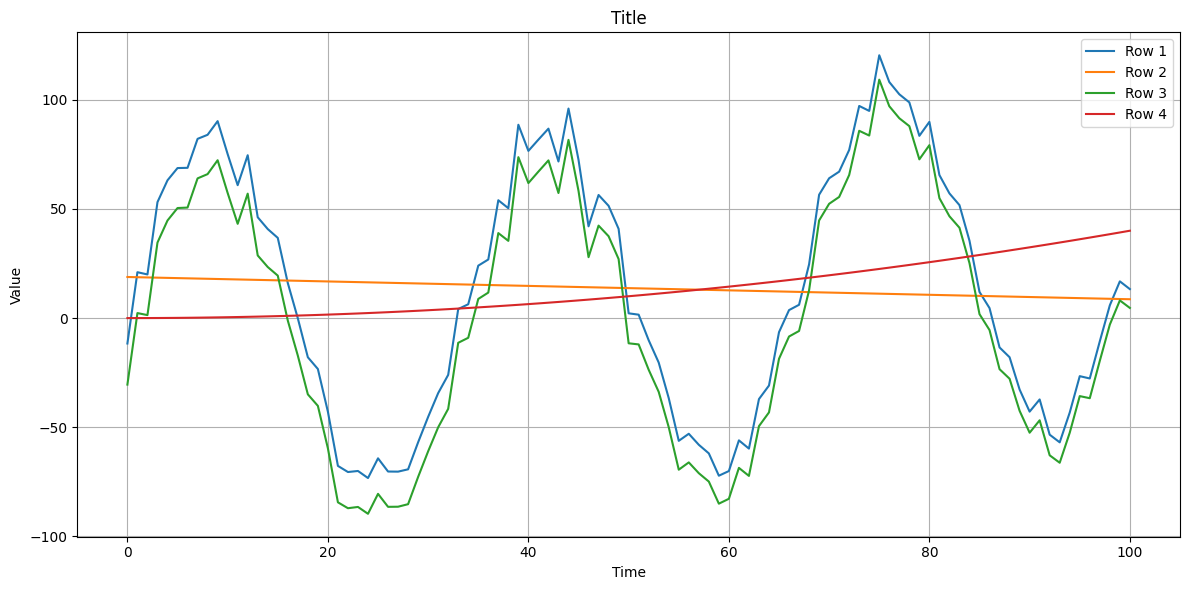

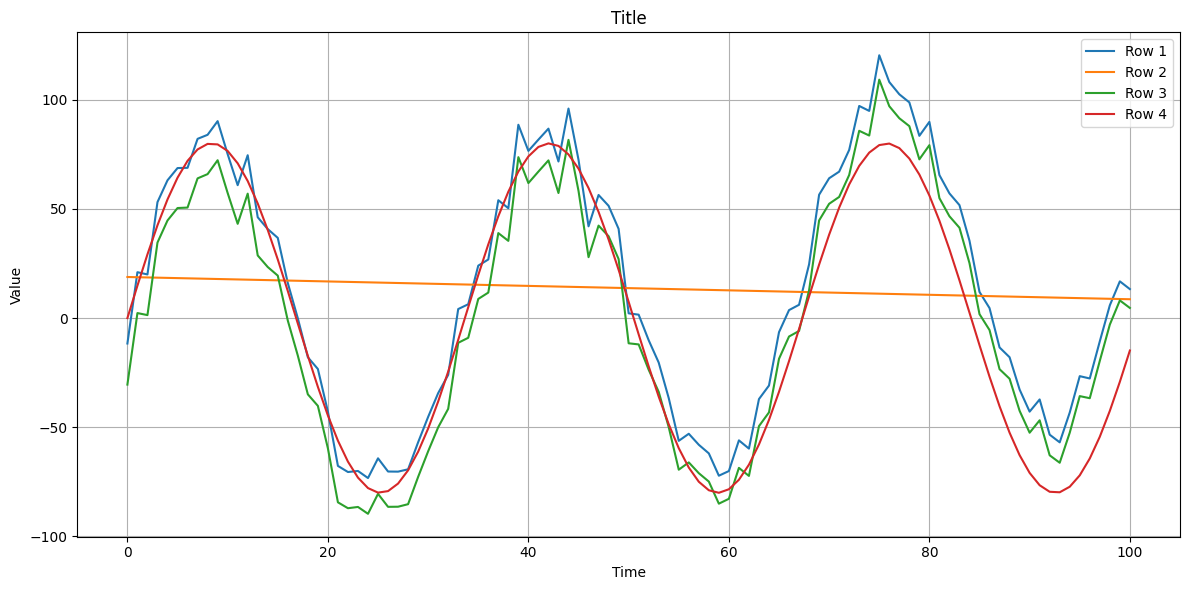

In [7]:
for k, v in dt['meta'][0].items():
    if k != 'noise':
        generator_name = v['params']['general']['generator_name']
        generator_params = v['params']['gen_params']
        restored_signal = generator_mapping.get(generator_name)(**generator_params)
        if k == 'trend':
            trend_row = restored_signal
 
        plot_series([row, results[0].component, results[0].results['detrended'], restored_signal])

/home/ilia_linux/autolabeling_time_series_data/.basic_312/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


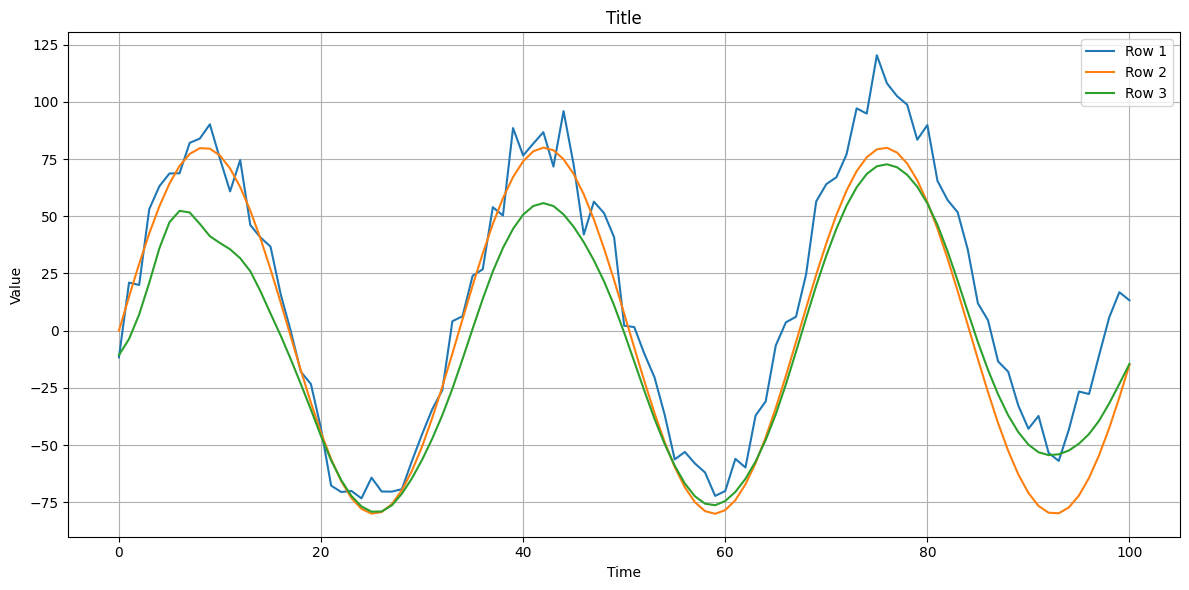

In [8]:
row = dt['data'][0]
pipeline_single = FE_pipeline([DWT_seasonality(level=10)])
processed_data = pipeline_single.apply(row)
results = pipeline_single.get_results()
# print(results[0].component)

plot_series([row, restored_signal, results[0].component])

In [9]:
row = dt['data'][0]
pipeline_single = FE_pipeline([Linregress_detrender(), DWT_seasonality(level=10)])
processed_data = pipeline_single.apply(row)
results = pipeline_single.get_results()

results[1]

FE_result(component=array([-15.97111294,  -8.91430959,   1.8653405 ,  15.80259228,
        30.93584999,  42.4701727 ,  47.50539661,  46.82546625,
        41.88434778,  36.47563284,  33.52641557,  30.80719284,
        26.93045058,  21.29059713,  12.66266431,   2.97310788,
        -6.50811168, -16.74049569, -27.48299668, -38.58273971,
       -50.02785226, -60.47105892, -69.02975199, -75.74846807,
       -80.29702906, -82.44781084, -82.24128956, -79.46578285,
       -74.26663123, -67.36864771, -59.23003186, -49.91202429,
       -39.49950118, -27.80989642, -14.86679983,  -1.47282151,
        11.62459685,  23.72316499,  34.07830439,  42.49461719,
        48.78673701,  52.63779265,  53.98977066,  52.78918338,
        49.20583494,  43.87553396,  37.2515633 ,  29.40044497,
        20.36724849,   9.92868225,  -1.94333343, -14.53133059,
       -27.17768034, -39.26731563, -50.1140519 , -59.50973835,
       -67.19760657, -72.70778531, -75.82277631, -76.3959535 ,
       -74.44565065, -70.40016962, 

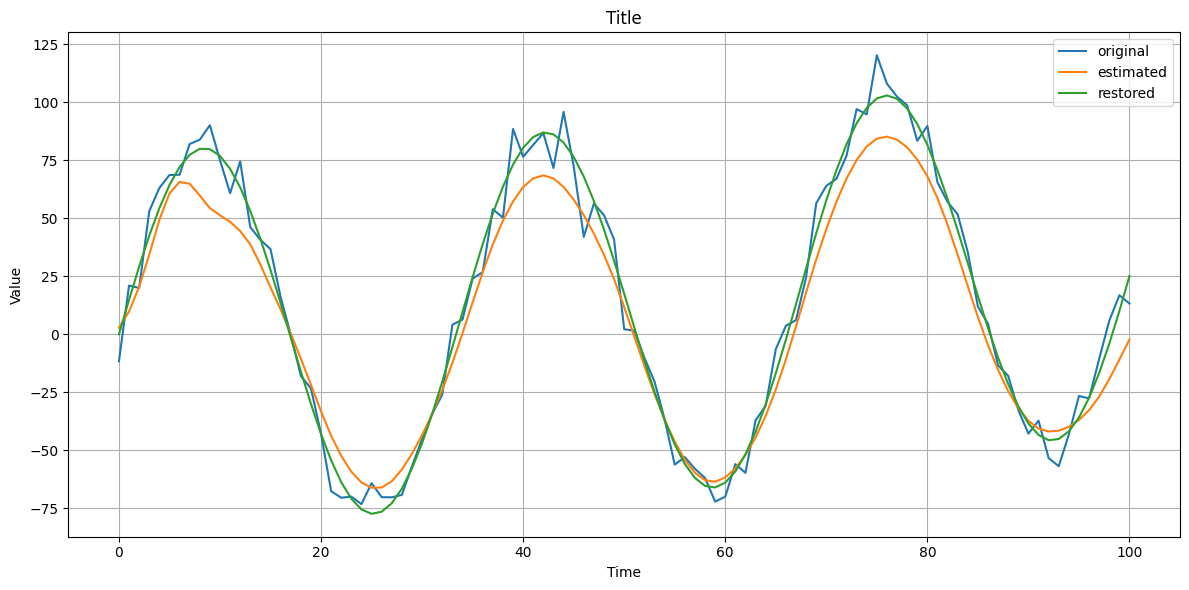

In [10]:
bl1 = TS_Block()
bl1.add_component(TS_component(results[0].component, {"general":{}, "model_name":results[0].method_name,"model_params":results[0].method_params}, 'trend'))
bl1.add_component(TS_component(results[1].component, {"general":{},"model_name":results[1].method_name,"model_params":results[1].method_params}, 'seasonality'))
bl1.add_component(TS_component(results[1].component, {"general":{},"model_name":results[1].method_name,"model_params":results[1].method_params}, 'seasonality'))

plot_series([row, bl1.get_series(), restored_signal+trend_row], ['original', 'estimated', 'restored'])

In [132]:
for n, row in enumerate(dt['data']):
    result = linregress_detrend(row)
    plot_series([result[0], result[1]], labels=['Detrended', 'Trend'], save_path= save_path / f'pics/result_{n}.png')
    if n == 0:
        save_config_file(result[2], save_path / f'params/result_params.yaml')
    save_config_file({str(k): str(v) for k, v in result[3].items()}, save_path / f'est_params/result_{n}.yaml')
    
    # –¥–ª—è rmse 
    meta = dt['meta'][n].copy()
    for k, v in meta.items():
        if k == 'noise':
            pass
        
        if k in est_comp:
            generator_name = v['params']['general']['generator_name']
            generator_params = v['params']['gen_params']
            
            restored_signal = generator_mapping.get(generator_name)(**generator_params)
            plot_series([row, result[1], restored_signal], labels=['Original', f'Est. {k.capitalize()}', f'Real {k.capitalize()}'], save_path= save_path / f'pics/result_{n}_comp.png')
        
            metrics[k].append(np.round(RMSE(restored_signal, result[1]), 5))

metrics = {k:str(v) for k,v in metrics.items()}

save_config_file(metrics, 'results/exp1/result_metrics.yaml')
plot_series([linregress_detrend(row)[1] for n, row in enumerate(dt['data'])], show_legend=False, plot_title='Trends', save_path= save_path / f'pics/trends.png')


In [ ]:

# mlflow server --backend-store-uri ".backend" --default-artifact-root ".artifacts" --host localhost --port 5000
import mlflow
import shutil
import ast

experiment_dir = Path("results/exp1")

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ —Å MLflow —Å–µ—Ä–≤–µ—Ä–æ–º
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("linregress_detrend")

# –ó–∞–≥—Ä—É–∂–∞–µ–º –æ–±—â–∏–π —Ñ–∞–π–ª –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
params_file = save_path / "params/result_params.yaml"
params = load_config_file(params_file)

with mlflow.start_run():

    # --- 1. –õ–æ–≥–∏—Ä—É–µ–º –æ–±—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ---
    def log_nested_params(d, prefix=""):
        for key, value in d.items():
            if isinstance(value, dict):
                log_nested_params(value, prefix=f"{prefix}{key}.")
            else:
                try:
                    mlflow.log_param(f"{prefix}{key}", value)
                except:
                    mlflow.log_param(f"{prefix}{key}", str(value))

    log_nested_params(params, prefix="params.")

    # --- 2. –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –∏ –º–µ—Ç—Ä–∏–∫–∏ ---
    est_params_paths = sorted(save_path.glob("est_params/*.yaml"))
    metrics_path = save_path / "result_metrics.yaml"

    metric_means = {}

    # –ß–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏
    metrics = {k:ast.literal_eval(v) for k,v in load_config_file(metrics_path).items()}

    # –õ–æ–≥–∏—Ä—É–µ–º —Å—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏
    for comp_name, values in metrics.items():
        mean_value = sum(values) / len(values) if values else float('nan')
        mlflow.log_metric(f"mean_{comp_name}_rmse", mean_value)
        metric_means[comp_name] = mean_value

    # --- 3. –õ–æ–≥–∏—Ä—É–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ ---
    mlflow.log_artifacts(save_path / "pics", artifact_path="pics")

    # --- 4. –õ–æ–≥–∏—Ä—É–µ–º YAML-—Ñ–∞–π–ª—ã ---
    mlflow.log_artifact(save_path / "result_metrics.yaml", artifact_path="metrics")
    mlflow.log_artifact(save_path / "params/result_params.yaml", artifact_path="params")
    mlflow.log_artifacts(save_path / "est_params", artifact_path="est_params")

    # --- 5. –¢–µ–≥–∏ ---
    mlflow.set_tag("method", "linregress_detrend_component_recovery")
    mlflow.set_tag("dataset", dataset_path)

print("‚úÖ –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —É—Å–ø–µ—à–Ω–æ –∑–∞–ª–æ–≥–∏—Ä–æ–≤–∞–Ω –≤ MLflow")

üèÉ View run powerful-loon-428 at: http://localhost:5000/#/experiments/982712660309993446/runs/fc994a0bc0494f368a6533bdc830bced
üß™ View experiment at: http://localhost:5000/#/experiments/982712660309993446
‚úÖ –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —É—Å–ø–µ—à–Ω–æ –∑–∞–ª–æ–≥–∏—Ä–æ–≤–∞–Ω –≤ MLflow


In [134]:
remove_result(save_path)

–ü–∞–ø–∫–∞ results/exp1 —É–¥–∞–ª–µ–Ω–∞


## Seasonality decomposition

## Shift / anomaly detection

## Noise estimation

# DNN 

## ts2vec

In [3]:
from ts2vec import TS2Vec
import torch 
import random

# meta
baseline_synth = Path('data/Synthetic_data/17_06_samples')
baseline_real = Path('data/OneShot_benchmark')

# def set_seed(seed):
#     torch.manual_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed_all(seed)
#         torch.backends.cudnn.deterministic = True
#         torch.backends.cudnn.benchmark = False

# set_seed(42)  # –ü–µ—Ä–µ–¥ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–æ–¥–µ–ª–∏

In [4]:
# meta
train_path = 'lin_sin/sample1_10_1_0.json'
test_path = 'lin_sin/sample1_10_4_0.json'
loader = Format1_loader()
train_data = loader.load_data(baseline_synth / train_path)
test_data = loader.load_data(baseline_synth / test_path)

In [5]:
train_ten = np.array(train_data['data']).reshape(10,101,1)
test_ten = np.array(test_data['data']).reshape(10,101,1)

train_ten.shape

(10, 101, 1)

In [9]:
load_config_file('patrec/feature_extraction/ts2vec.yaml')

{'model_init': {'output_dims': 128,
  'hidden_dims': 64,
  'depth': 10,
  'lr': 0.001,
  'device': 'cuda:1',
  'batch_size': 8},
 'model_training': {'n_epochs': 20, 'verbose': True},
 'encode_params': {'encoding_window': 'full_series',
  'sliding_length': 1,
  'sliding_padding': 50,
  'batch_size': 1},
 'model_save_path': 'experiments/FE_with_ts2vec/ts2vec_config1/model.pt'}

In [10]:
config = {'model_init': {'output_dims': 128,
  'hidden_dims': 64,
  'depth': 10,
  'lr': 0.001,
  'device': 'cuda:1',
  'batch_size': 8},
 'model_training': {'n_epochs': 20, 'verbose': True},
 'encode_params': {
  'encoding_window': 'full_series',
  'mask':None,   
  'sliding_length': 1,
  'sliding_padding': 50,
  'batch_size': 1},
 'model_save_path': 'experiments/FE_with_ts2vec/ts2vec_config1/model.pt'}

model_params = config['model_init']
model_lr = config['model_training']

set_seed(42)  # –ü–µ—Ä–µ–¥ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–æ–¥–µ–ª–∏

# Train a TS2Vec model
model = TS2Vec(
    input_dims=train_ten.shape[-1],
    device=1,
    output_dims=model_params['output_dims'],
    hidden_dims=model_params['hidden_dims'],
    depth=model_params['depth'],
    lr=model_params.get('lr')
)


loss_log = model.fit(
    train_ten,
    n_epochs=model_lr['n_epochs'],
    n_iters=model_lr.get('n_iters'),
    verbose=model_lr['verbose']
)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
encode_params = config.get('encode_params', {})
encoding_window = encode_params.get('encoding_window', 'full_series')

# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
if encoding_window == 'full_series':
    test_repr = model.encode(test_ten, 
                                mask=encode_params.get('mask', None), encoding_window='full_series')
else:
    test_repr = model.encode(
        test_ten,
        mask=encode_params.get('mask', None), 
        encoding_window=encoding_window,
        sliding_length=encode_params.get('sliding_length', None),
        sliding_padding=encode_params.get('sliding_padding', None)
    )


Epoch #0: loss=22120.482421875
Epoch #1: loss=14569.0693359375
Epoch #2: loss=5953.7001953125
Epoch #3: loss=4143.94873046875
Epoch #4: loss=2387.1826171875
Epoch #5: loss=1814.3521728515625
Epoch #6: loss=1587.14794921875
Epoch #7: loss=1152.3927001953125
Epoch #8: loss=932.9400024414062
Epoch #9: loss=842.8411865234375
Epoch #10: loss=857.5715942382812
Epoch #11: loss=610.2322998046875
Epoch #12: loss=604.830078125
Epoch #13: loss=555.895263671875
Epoch #14: loss=420.4154052734375
Epoch #15: loss=342.8506774902344
Epoch #16: loss=349.42083740234375
Epoch #17: loss=337.6708984375
Epoch #18: loss=259.6014709472656
Epoch #19: loss=237.20327758789062


In [11]:
test_repr.shape

(10, 128)

In [12]:
from patrec.feature_extraction.dnn_methods.embedding_methods import TS2VecExtractor
set_seed(42)  # –ü–µ—Ä–µ–¥ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π –º–æ–¥–µ–ª–∏

config = {'model_init': {'output_dims': 128,
  'hidden_dims': 64,
  'depth': 10,
  'lr': 0.001,
  'device': 'cuda:1'},
 'model_training': {'n_epochs': 20, 'verbose': True},
 'encode_params': {'encoding_window': 'full_series',
  'sliding_length': 1,
  'sliding_padding': 50,
  'batch_size': 1},
 'model_save_path': 'experiments/FE_with_ts2vec/ts2vec_config1/model.pt'}


ts2vec_extractor = TS2VecExtractor(
    config=config,
    train_on_init=True,
    input_data=train_ten
)

results = ts2vec_extractor.extract(test_ten)

Epoch #0: loss=22120.482421875
Epoch #1: loss=14569.0693359375
Epoch #2: loss=5953.7001953125
Epoch #3: loss=4143.94873046875
Epoch #4: loss=2387.1826171875
Epoch #5: loss=1814.3521728515625
Epoch #6: loss=1587.14794921875
Epoch #7: loss=1152.3927001953125
Epoch #8: loss=932.9400024414062
Epoch #9: loss=842.8411865234375
Epoch #10: loss=857.5715942382812
Epoch #11: loss=610.2322998046875
Epoch #12: loss=604.830078125
Epoch #13: loss=555.895263671875
Epoch #14: loss=420.4154052734375
Epoch #15: loss=342.8506774902344
Epoch #16: loss=349.42083740234375
Epoch #17: loss=337.6708984375
Epoch #18: loss=259.6014709472656
Epoch #19: loss=237.20327758789062


In [13]:
results.component == test_repr

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## CoST

In [6]:
from patrec.feature_extraction.dnn_methods.embedding_methods import CoSTExtractor

In [7]:
config = {
    'model_init': {
        'input_dim': 1,
        'output_dims': 64,
        'hidden_dims': 32,
        'kernels': [1, 2, 4, 8, 16, 32],
        'alpha': 0.0005,
        'max_train_length': 100,
        'device': 'cuda',
        'lr': 0.001,
        'batch_size': 8
    },
    'model_training': {
        'n_epochs': 20,
        'verbose': True
    },
    'encode_params': {
        'encoding_window': 'full_series',
        'sliding_length': None,
        'sliding_padding': 0
    },
    'model_save_path': 'path/to/model.pkl'
}

In [8]:
# train_ten = torch.as_tensor(np.array(train_data['data']), dtype=torch.float64).unsqueeze(-1)
# test_ten = torch.as_tensor(np.array(test_data['data']), dtype=torch.float64).unsqueeze(-1)

train_ten.shape

(10, 101, 1)

In [9]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å –æ–±—É—á–µ–Ω–∏–µ–º
cost_extractor = CoSTExtractor(
    config=config,
    train_on_init=True,
    input_data=train_ten
)

result = cost_extractor.extract(test_ten)

Epoch #0: loss=0.02132885344326496
Epoch #1: loss=0.2710281312465668
Epoch #2: loss=0.2775450646877289
Epoch #3: loss=0.6458356380462646
Epoch #4: loss=0.5377062559127808
Epoch #5: loss=0.39153316617012024
Epoch #6: loss=0.9631766676902771
Epoch #7: loss=0.7859887480735779
Epoch #8: loss=1.6419159173965454
Epoch #9: loss=2.1714773178100586
Epoch #10: loss=0.2490381896495819
Epoch #11: loss=0.9794872403144836
Epoch #12: loss=0.7909318804740906
Epoch #13: loss=2.0118157863616943
Epoch #14: loss=1.7145994901657104
Epoch #15: loss=2.073125123977661
Epoch #16: loss=1.5236340761184692
Epoch #17: loss=1.7464333772659302
Epoch #18: loss=1.2624402046203613
Epoch #19: loss=1.945925235748291


In [13]:
test_ten.shape, result.results['embedding'].squeeze(1)

((10, 101, 1), (10, 1, 64))

## Neural Prophet / N-Beats

In [8]:
# from darts.models import NBEATSModel
# from darts.datasets import AirPassengersDataset
# from darts.dataprocessing.transformers import Scaler

# # –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# series = AirPassengersDataset().load()

# # scaler = Scaler()
# # series_scaled = scaler.fit_transform(series)

# # –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train/test
# # train, test = series_scaled.split_after(0.75)

# # # –û–±—É—á–µ–Ω–∏–µ N-BEATS
# # model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)
# # model.fit(train_ten)

# # # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
# # prediction = model.predict(n=len(test_ten))

In [1]:
# !pip uninstall darts --y
# !pip install darts 

/root/patrec_time_series/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:589: LightningDeprecationWarning: The Trainer argument `auto_select_gpus` has been deprecated in v1.9.0 and will be removed in v2.0.0. Please use the function `pytorch_lightning.accelerators.find_usable_cuda_devices` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX 6000 Ada Generation') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name            | Type             | Params
-----------

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX 6000 Ada Generation') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


<Axes: xlabel='time'>

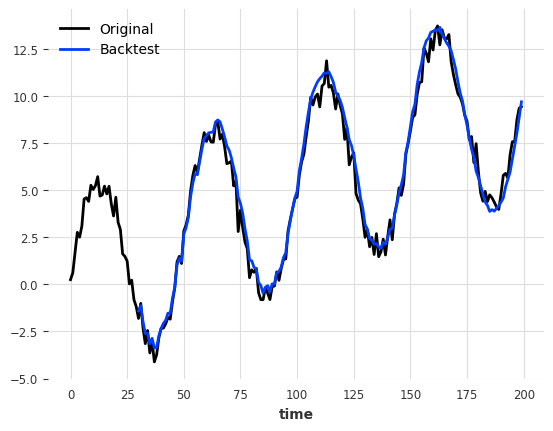

In [20]:
from darts import TimeSeries
from darts.models import NBEATSModel
import numpy as np

# 1. –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞ –±–µ–∑ timestamp
np.random.seed(42)
n_points = 200
trend = np.linspace(0, 10, n_points)  # –õ–∏–Ω–µ–π–Ω—ã–π —Ç—Ä–µ–Ω–¥
seasonality = 5 * np.sin(2 * np.pi * np.linspace(0, 4, n_points))  # –°–µ–∑–æ–Ω–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞
noise = np.random.normal(0, 0.5, n_points)
data = trend + seasonality + noise

# 2. –°–æ–∑–¥–∞–µ–º TimeSeries –±–µ–∑ timestamp
series = TimeSeries.from_values(data)

# 3. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ train / test
train, test = series.split_after(0.8)

# 4. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –º–æ–¥–µ–ª—å —Å —É–∫–∞–∑–∞–Ω–∏–µ–º CUDA —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
model = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=1,
    n_epochs=50,
    random_state=42,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [1],  # –£–∫–∞–∑—ã–≤–∞–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å cuda:1
        "auto_select_gpus": False,
    },
)

# 5. –û–±—É—á–µ–Ω–∏–µ
model.fit(train)

# 6. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
backtest = model.historical_forecasts(series, forecast_horizon=1, retrain=False)

# 7. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
series.plot(label='Original')
backtest.plot(label='Backtest')

In [21]:
model

NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=1, n_epochs=50, random_state=42, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [1], 'auto_select_gpus': False})

# opt

In [32]:
import optuna
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.datasets import make_blobs

# –ì–µ–Ω–µ—Ä–∞—Ü–∏—è —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42)
# X = result.results['embedding'].squeeze(1)

def objective(trial):
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
    n_clusters = trial.suggest_int("n_clusters", 2, 9)
    init = trial.suggest_categorical("init", ["k-means++", "random"])
    n_init = trial.suggest_int("n_init", 5, 20)
    
    # –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    
    # –ú–æ–∂–Ω–æ –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ–¥–Ω—É –º–µ—Ç—Ä–∏–∫—É –∏–ª–∏ –∫–æ–º–±–∏–Ω–∞—Ü–∏—é
    return silhouette  # –∏–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, 0.7 * silhouette + 0.3 * calinski

study = optuna.create_study(direction="maximize")  # silhouette_score –Ω—É–∂–Ω–æ –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å
study.optimize(objective, n_trials=50)

print("–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", study.best_params)
print("–õ—É—á—à–∏–π Silhouette Score:", study.best_value)

[I 2025-07-03 10:30:21,652] A new study created in memory with name: no-name-82475255-9633-42fb-bf60-cf0220af4a37
[I 2025-07-03 10:30:21,721] Trial 0 finished with value: 0.6779388924748059 and parameters: {'n_clusters': 5, 'init': 'random', 'n_init': 15}. Best is trial 0 with value: 0.6779388924748059.
[I 2025-07-03 10:30:21,742] Trial 1 finished with value: 0.6779388924748059 and parameters: {'n_clusters': 5, 'init': 'random', 'n_init': 5}. Best is trial 0 with value: 0.6779388924748059.
[I 2025-07-03 10:30:21,771] Trial 2 finished with value: 0.7011168837492409 and parameters: {'n_clusters': 3, 'init': 'random', 'n_init': 7}. Best is trial 2 with value: 0.7011168837492409.
[I 2025-07-03 10:30:21,818] Trial 3 finished with value: 0.5311106725358469 and parameters: {'n_clusters': 7, 'init': 'k-means++', 'n_init': 15}. Best is trial 2 with value: 0.7011168837492409.
[I 2025-07-03 10:30:21,859] Trial 4 finished with value: 0.42594726289153234 and parameters: {'n_clusters': 8, 'init': 'k

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_clusters': 4, 'init': 'random', 'n_init': 13}
–õ—É—á—à–∏–π Silhouette Score: 0.7270405117710104


In [35]:
X, _ = make_blobs(n_samples=1000, n_features=10, centers=5, random_state=42)
X.shape

(1000, 10)

In [ ]:
import optuna
from optuna.samplers import NSGAIISampler

def multi_objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 2, 10)
    init = trial.suggest_categorical("init", ["k-means++", "random"])
    n_init = trial.suggest_int("n_init", 5, 20)
    
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
    labels = kmeans.fit_predict(X)
    
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    
    return silhouette, calinski  # Optuna –ø–æ–ø—ã—Ç–∞–µ—Ç—Å—è –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –æ–±–∞ –∑–Ω–∞—á–µ–Ω–∏—è

study = optuna.create_study(
    directions=["maximize", "maximize"],
    sampler=NSGAIISampler()
)
study.optimize(multi_objective, n_trials=50)

# –ü–æ–ª—É—á–∞–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ Pareto-–æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö —Ä–µ—à–µ–Ω–∏–π
print("Pareto —Ñ—Ä–æ–Ω—Ç:")
for trial in study.best_trials:
    print(f"Silhouette: {trial.values[0]}, Calinski: {trial.values[1]}, Params: {trial.params}")

[I 2025-07-03 05:15:08,609] A new study created in memory with name: no-name-4d7514f9-d829-4951-ae47-7f9dac0b3782
[I 2025-07-03 05:15:08,650] Trial 0 finished with values: [0.7011168837492409, 3452.7027452468196] and parameters: {'n_clusters': 3, 'init': 'random', 'n_init': 13}.
[I 2025-07-03 05:15:08,687] Trial 1 finished with values: [0.5976284188311998, 6567.877891062333] and parameters: {'n_clusters': 6, 'init': 'k-means++', 'n_init': 10}.
[I 2025-07-03 05:15:08,747] Trial 2 finished with values: [0.7270405117710104, 5867.089480692821] and parameters: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 20}.
[I 2025-07-03 05:15:08,793] Trial 3 finished with values: [0.5903135223407893, 1033.4086023432521] and parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 17}.
[I 2025-07-03 05:15:08,825] Trial 4 finished with values: [0.5903135223407893, 1033.4086023432521] and parameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 9}.
[I 2025-07-03 05:15:08,852] Trial 5 finished wi

Pareto —Ñ—Ä–æ–Ω—Ç:
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 20}
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'k-means++', 'n_init': 12}
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'random', 'n_init': 18}
Silhouette: 0.6779388924748059, Calinski: 7519.743991825282, Params: {'n_clusters': 5, 'init': 'k-means++', 'n_init': 5}
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'random', 'n_init': 6}
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'random', 'n_init': 18}
Silhouette: 0.7270405117710104, Calinski: 5867.089480692821, Params: {'n_clusters': 4, 'init': 'random', 'n_init': 12}
Silhouette: 0.6779388924748059, Calinski: 7519.743991825282, Params: {'n_clusters': 5, 'init': 'random', 'n_init': 6}
Silhouette: 0.727040511